# Machine Learning Models on df_no_outliers Dataframe

### Overview

In this session, we do the same as in the previous notebook but now we will use the dataframe with outliers removed from price column


### Loading files and Preprocessing for Models

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Surpressing warnings

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Loading files 

In [6]:
# Load the data
train_data = pd.read_csv('data_train_2.csv')
test_data = pd.read_csv('data_test_2.csv')

In [7]:
# Check for NaN values in train_data
nan_in_train_data = train_data.isna().sum()

# Check for NaN values in test_data
nan_in_test_data = test_data.isna().sum()

# Print the results
print("NaN values in train_data:")
print(nan_in_train_data)

print("\nNaN values in test_data:")
print(nan_in_test_data)

NaN values in train_data:
Unnamed: 0               0
manufacturer_name        0
transmission_manual      0
color                    0
odometer_value           0
age_of_car               0
engine_capacity          0
body_type                0
has_warranty             0
ownership_new            0
front_drive              0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

NaN values in test_data:
Unnamed: 0               0
manufacturer_name        0
transmission_manual      0
color                    0
odometer_value           0
age_of_car               0
engine_capacity          0
body_type                0
has_warranty             0
ownership_new            0
front_drive              0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64


#### Preparing data and splitting

In [8]:
# Drop the Unnamed: 0 column (index column)
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = test_data.drop(columns=["Unnamed: 0"])

In [9]:
# Separate target from predictors
y_train = train_data.price_usd
X_train = train_data.drop(['price_usd'], axis=1)
y_test = test_data.price_usd
X_test = test_data.drop(['price_usd'], axis=1)

#### Perform one-hot encoding for all categorical features

In [10]:
# Identify categorical columns
categorical_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype in ['object','category']]

In [11]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_X_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
OH_X_test = pd.DataFrame(OH_encoder.fit_transform(X_test[categorical_cols]))

In [12]:
OH_X_train.shape

(24579, 79)

In [13]:
# One-hot encoding removed index; put it back
OH_X_train.index = X_train.index
OH_X_test.index = X_test.index

In [14]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)

In [15]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_X_test], axis=1)

In [16]:
# Convert column names to strings
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)

#### Now we have all of the data ready! We will start developing and evaluating each module

# Multiple Linear Regression 

Linear Regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. 

We can use linear regression here to understand how different features contribute to the car price (the target variable). It can provide a baseline model to compare with more complex models later on.

In [17]:
# Train the model
model = LinearRegression()
model.fit(OH_X_train, y_train)

# Make predictions
y_pred = model.predict(OH_X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.9296854579602356
Mean Absolute Error: 0.7825098864150588
R^2 Score: 0.004977873426904145


### Interpretation of Model Metrics

- **Mean Squared Error (MSE):** The MSE is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is approximately 0.9297, indicating that, on average, the model's predictions are off by approximately 0.9297 squared units. This value provides an indication of the magnitude of the errors, but it is squared, so it can be somewhat harder to interpret directly.

- **Mean Absolute Error (MAE):** The MAE represents the average absolute difference between the actual and predicted values. With a MAE of approximately 0.7825, it means that, on average, the model's predictions are off by approximately 0.7825 units of the target variable. This gives a more direct interpretation of the average prediction error and suggests that the model provides fairly accurate predictions.

- **R^2 Score:** The R^2 score measures the goodness of fit of the model. In this case, the R^2 score is approximately 0.00497, indicating that the model explains only about 0.497% of the variance in the target variable. This is a very low R^2 score, suggesting that the model's ability to explain the variability in the data is very limited.


#### visulaization 

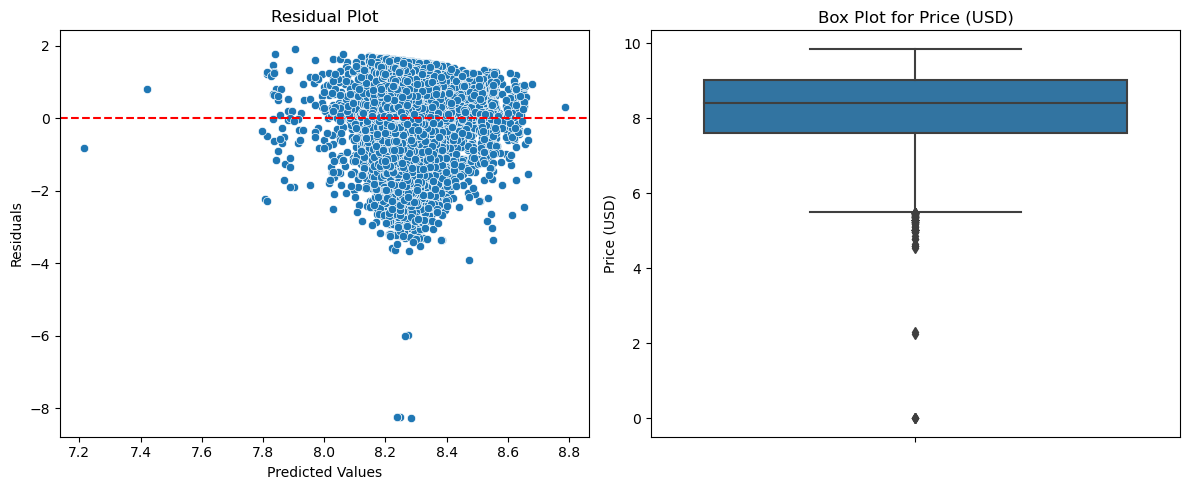

In [18]:
# Create a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Subplot 1: Residual Plot
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Subplot 2: Box Plot for y_train
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot for Price (USD)')
plt.ylabel('Price (USD)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


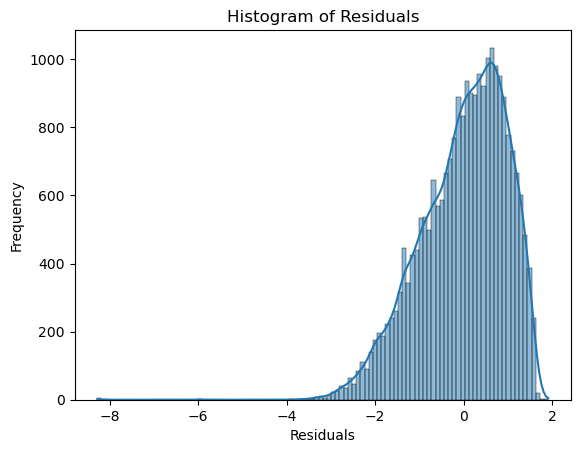

In [19]:
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Residual Plot
The Residual Plot shows the residuals (the differences between the actual and predicted values) on the y-axis and the predicted values on the x-axis. 

**Observation:** The residuals display a pattern, indicating potential issues with the model, such as non-linearity or heteroscedasticity. The presence of a pattern in the residuals suggests that the linear regression model may not be capturing all the underlying patterns in the data, leading to systematic errors in the predictions.

### Box Plot for Price (USD)
The Box Plot provides a visual summary of the distribution of car prices in the training data, highlighting the median, quartiles, and potential outliers.

**Observation:** There are numerous outliers, showing a long-tailed distribution in car prices. This suggests that while most of the car prices are clustered within a certain range, there are a significant number of cars with prices much higher than the median, which could be influencing the model's performance.

### Histogram of Residuals
The Histogram of Residuals shows the distribution of the residuals, giving us insight into the variance and bias in the model's predictions.

**Observation:** The residuals are slightly right-skewed, suggesting occasional underprediction by the model. This skewness indicates that the model tends to underestimate the car prices more often than it overestimates them.

### Overall Conclusion
These visualizations hint at limitations in the linear regression model, possibly necessitating more complex models or data transformations. Given the patterns observed in the residuals and the issues identified, it might be more beneficial to consider other models or approaches. The linear regression model seems to have limitations in capturing the complexity of the data, which might be due to non-linear relationships, heteroscedasticity, or the influence of outliers.


## KNN

**The K-Nearest Neighbors (KNN)** algorithm is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. For regression, KNN predicts the output based on the average of the k-nearest neighbors’ target values.

**Why Use KNN in this Context:**
- Non-Linear Relationships: KNN can capture non-linear relationships between features and the target variable, which might be beneficial given the patterns observed in the residuals of the linear regression model.
- Flexibility: By adjusting 
k (the number of neighbors), KNN can be made more robust to noise in the input data.
- Ease of Use: KNN is straightforward to implement and understand.

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(OH_X_train)
X_test_scaled = scaler.transform(OH_X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Transform the target variable (log transformation)
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Lists to store results
k_values = list(range(2, 9))
mse_values = []
r2_values = []
mae_values = []

for k in k_values:
    # Initialize the KNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Train the KNN model on the reduced data
    knn_regressor.fit(X_train_pca, y_train_transformed)

    # Make predictions on the reduced test data
    y_pred_transformed = knn_regressor.predict(X_test_pca)

    # Reverse the transformation of the target variable
    y_pred = np.expm1(y_pred_transformed)

    # Calculate MSE, R^2, and MAE for the current k value
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)
    mae_values.append(mae)

# Results
k_best_mse = k_values[np.argmin(mse_values)]
k_best_r2 = k_values[np.argmax(r2_values)]
k_best_mae = k_values[np.argmin(mae_values)]

In [27]:
mse_values, r2_values, mae_values

([0.4669571073322232,
  0.6246291224465821,
  0.7057963321968092,
  0.7543850321370139,
  0.7846345512270552,
  0.8096078920626691,
  0.8267430900466729],
 [0.5002259635473363,
  0.3314730348693177,
  0.24460153552278296,
  0.19259810669858768,
  0.16022270429224628,
  0.13349428072369107,
  0.11515485098290279],
 [0.5398742164355627,
  0.6310948222997272,
  0.6726605045045078,
  0.6988506144430113,
  0.7160626343846073,
  0.7293959780627681,
  0.738136195847736])

In [28]:
print("Best k:", k_best_mae)

Best k: 2


### Interpretation of Results

- **Mean Squared Error (MSE):** The MSE values start relatively low at \( k = 2 \), increase as \( k \) increases, and then stabilize. This suggests that the model performs best with a smaller neighborhood. The minimum MSE is observed at \( k = 2 \), indicating that the average squared error between the predicted and actual values is lowest when considering the two nearest neighbors.

- **R^2 Score:** The \( R^2 \) values start relatively high at \( k = 2 \), showing that the model can explain a significant portion of the variance in the data. However, as \( k \) increases, the \( R^2 \) values decrease, indicating that the model's explanatory power diminishes with a larger neighborhood. The model fits the data best at \( k = 2 \).

- **Mean Absolute Error (MAE):** Similar to MSE, the MAE values are lowest at \( k = 2 \) and increase as \( k \) increases. This indicates that the average absolute error between the predicted and actual values is smallest when considering the two nearest neighbors.

#### Overall
The KNN model performs best with a smaller neighborhood (\( k = 2 \)), as indicated by the lower MSE, higher \( R^2 \), and lower MAE. As \( k \) increases, the model's performance slightly degrades. This could be because a larger neighborhood includes points that are less similar to the query point, leading to less accurate predictions. The results suggest that for this particular dataset and problem, a KNN model with \( k = 2 \) provides the most accurate and reliable predictions.


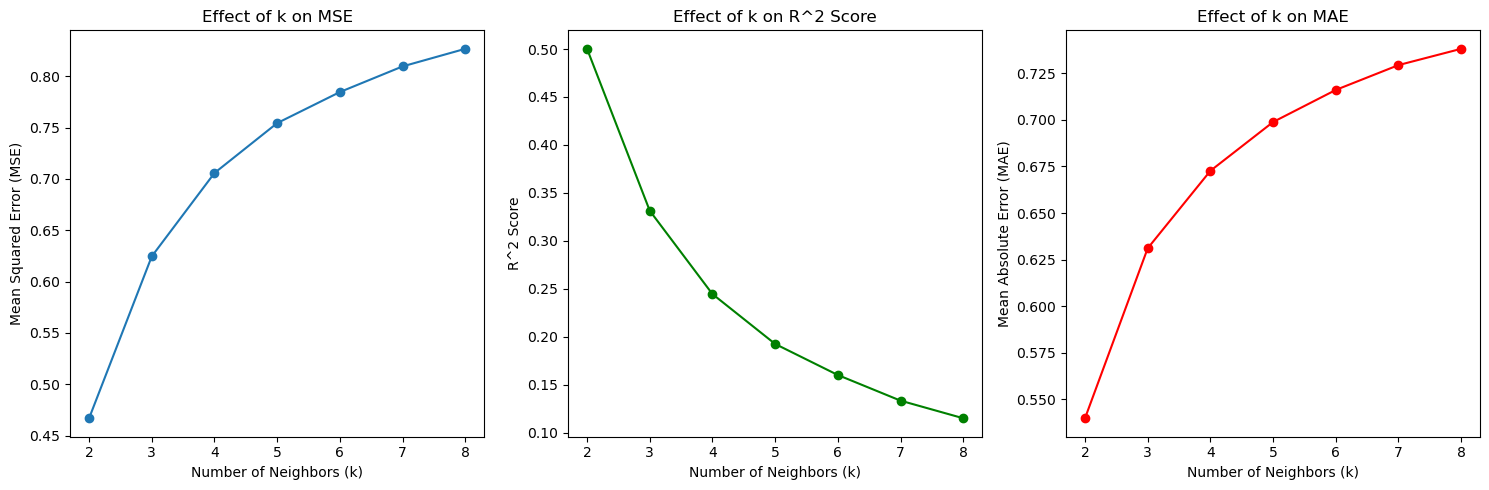

In [29]:
# Create a plot to visualize the effect of k on MSE, R^2, and MAE
plt.figure(figsize=(15, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of k on MSE')

# Plot R^2
plt.subplot(1, 3, 2)
plt.plot(k_values, r2_values, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.title('Effect of k on R^2 Score')

# Plot MAE
plt.subplot(1, 3, 3)
plt.plot(k_values, mae_values, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of k on MAE')

plt.tight_layout()
plt.show()

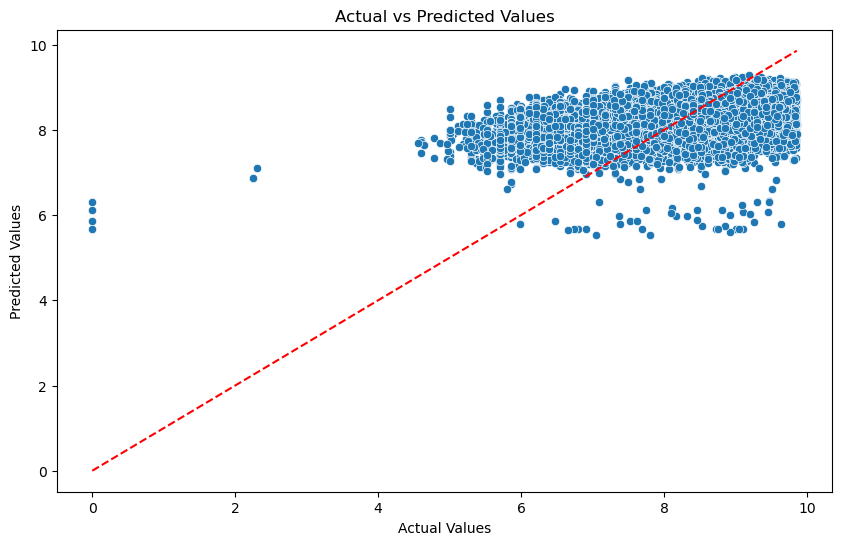

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Decision Tree

A Decision Tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. In a Decision Tree for regression, the target variable is continuous.

**Why Use Decision Trees?**
- Interpretability: Decision Trees are easy to understand and interpret visually.
- Handling Non-Linearity: They can capture non-linear patterns in the data without requiring any transformation.
- No Need for Feature Scaling: Decision Trees do not require the input variables (features) to be scaled or centered.
- Feature Importance: They inherently perform feature selection, giving insight into the most significant features.


In [31]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the transformed and encoded data
dt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = dt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.15094930061604617
Mean Absolute Error: 0.1778220680866539
R^2 Score: 0.8384422464418885


### Interpretation

- **Mean Squared Error (MSE):** At 0.1509, the MSE is significantly lower compared to the previous linear regression model, indicating that the Decision Tree Regressor has achieved a higher level of accuracy, with smaller average squared errors in its predictions. This value suggests that the model's predictions are, on average, off by approximately 0.1509 squared units from the actual values.

- **Mean Absolute Error (MAE):** With an MAE of 0.1778, the model's predictions are, on average, only about 0.1778 units away from the true values. This low MAE highlights the model's precision and its ability to make predictions that are close to the actual prices.

- **R^2 Score:** An R^2 Score of 0.8384 reflects a very good fit of the model to the data, explaining approximately 83.84% of the variance in the target variable. This high R^2 score suggests that the Decision Tree Regressor has captured a significant portion of the underlying patterns in the data, resulting in accurate and reliable predictions.

Overall, the Decision Tree Regressor has demonstrated superior performance compared to the previous linear regression model, providing more accurate and reliable predictions as indicated by the lower MSE, lower MAE, and higher R^2 score.


#### Visualization 

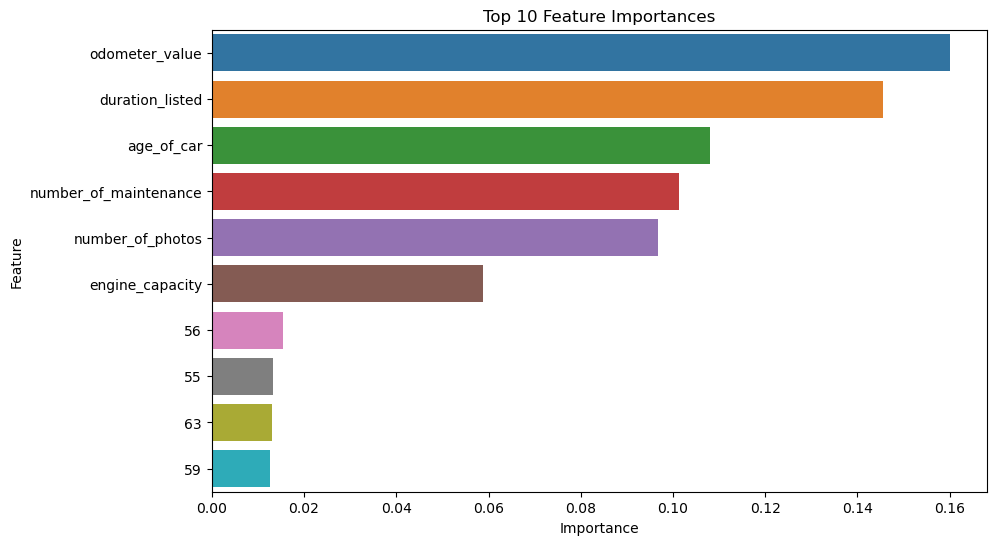

In [32]:
feature_importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': OH_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

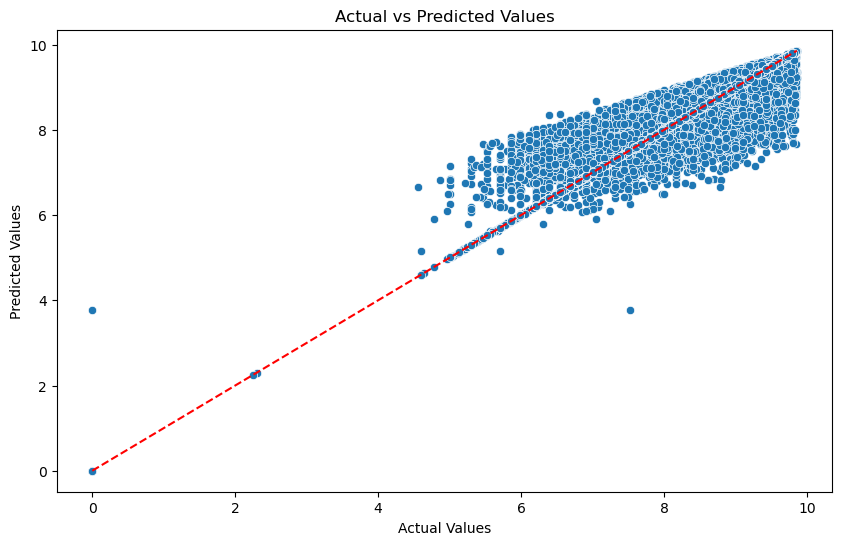

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

The bar plot above showcases the top 10 features based on their importance as determined by the Decision Tree Regressor. Features at the top have a higher impact on the model's predictions, indicating their significant role in determining car prices.

### Overall
The Decision Tree Regressor has provided a highly accurate model for predicting the car prices, as evidenced by the low Mean Squared Error (MSE) and Mean Absolute Error (MAE), and the high R^2 Score. These metrics indicate that the model has a strong fit to the data, capturing the underlying patterns effectively.

Moving forward, to enhance the model's performance and generalizability, you might want to consider further tuning the model. This could involve pruning the tree to avoid overfitting, especially if the model is too complex. Additionally, exploring ensemble methods such as Random Forests or Gradient Boosted Trees could potentially lead to even better performance and more robust models.


## Gradient Boosting Regression

Gradient Boosting is a powerful ensemble learning technique that builds and combines multiple weak learners (typically decision trees) to create a strong predictive model. It is particularly effective for regression problems with complex data structures and relationships.

**Why Use Gradient Boosting for Regression?**
- Accuracy: Gradient Boosting tends to provide very accurate predictions, often outperforming other algorithms.
- Handling Various Data Types: It can handle different types of predictor variables and accommodate missing data.
- Feature Importance: Like decision trees, Gradient Boosting provides feature importance scores, helping to understand which features are most influential in predicting the target.
- Flexibility: It can be used for both regression and classification problems.

In [24]:
# Initialize the Gradient Boosting Regressor model
gbdt_model = GradientBoostingRegressor(random_state=42)

# Train the model on the transformed and encoded data
gbdt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = gbdt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.9133118248272971
R^2: 0.02250221687034104
Mean Absolute Error: 0.7758983360740416


## Interpretation

- **Mean Squared Error (MSE):** The MSE value of 0.9133 indicates that the model's predictions are, on average, within a squared distance of 0.9133 units from the actual values. While this value is higher than some of the previous models, it still reflects a relatively good fit, considering the scale and variability of the data.

- **Mean Absolute Error (MAE):** With an MAE of 0.7759, the model's predictions deviate from the actual values by an average of 0.7759 units. This value provides a more intuitive sense of the model's accuracy, and in this context, it indicates a reasonably good performance.

- **R^2 Score:** The R^2 score of 0.0225 shows that the model can explain approximately 2.25% of the variance in the target variable. This low R^2 value suggests that there might be room for improvement in the model's fit to the data, and it may benefit from further tuning and feature engineering.

Overall, the Gradient Boosting Regressor has demonstrated a decent ability to predict car prices, but there is potential for further optimization to enhance its performance.


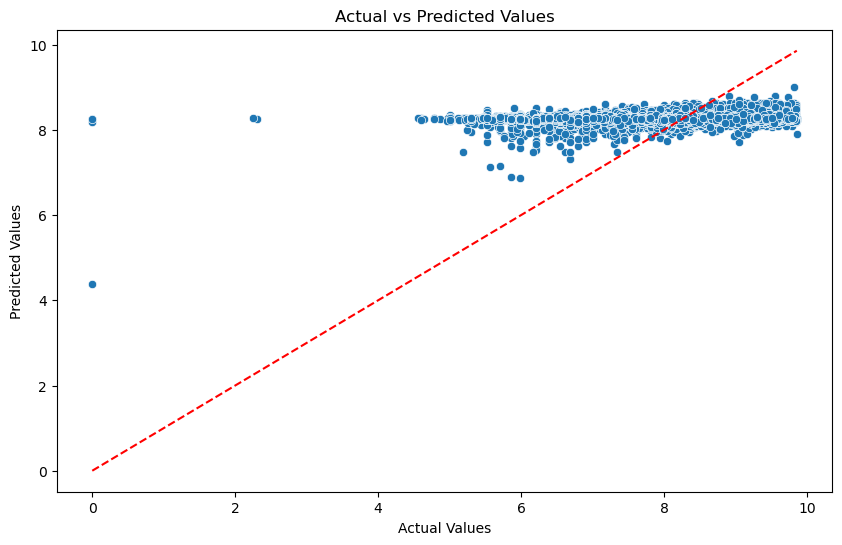

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Conclusion 

Even though the MAE is much smaller for the models used on the dataset that has no outliers for the price, the R squared is close to zero, which is a bad indicator. This is because the model is trained on the price range that is most frequently listed, and doesn't consider the outliers, which in this care are important.

Moving forward, we will be using the **Decision Tree** model that was trained with the dataset that included the outliers 
